In [672]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [673]:
train_data = pd.read_csv('../input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [674]:
train_data.drop('PassengerId', axis = 1, inplace=True)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


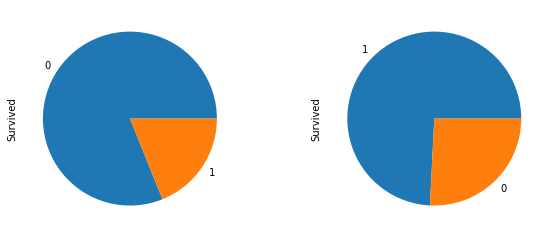

In [675]:
fig = plt.figure(figsize = (10, 4))
fig.add_subplot(121)
train_data.Survived[train_data['Sex'] == 'male'].value_counts().plot(kind = 'pie')
fig.add_subplot(122)
train_data.Survived[train_data['Sex'] == 'female'].value_counts().plot(kind = 'pie')
plt.show()

In [676]:
from sklearn.preprocessing import LabelEncoder
train_data["Sex"] = LabelEncoder().fit_transform(train_data["Sex"])

In [677]:
train_data["Name"] = train_data["Name"].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles = train_data["Name"].unique()
print(titles)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [678]:
train_data['Age'].fillna(-1, inplace = True)
medians = dict()

for title in titles:
    median = train_data.Age[(train_data["Age"] != -1) & (train_data["Name"] == title)].median()
    medians[title] = median

for index, row in train_data.iterrows():
    if row['Age'] == -1:
        train_data.loc[index, 'Age'] = medians[row['Name']]
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S


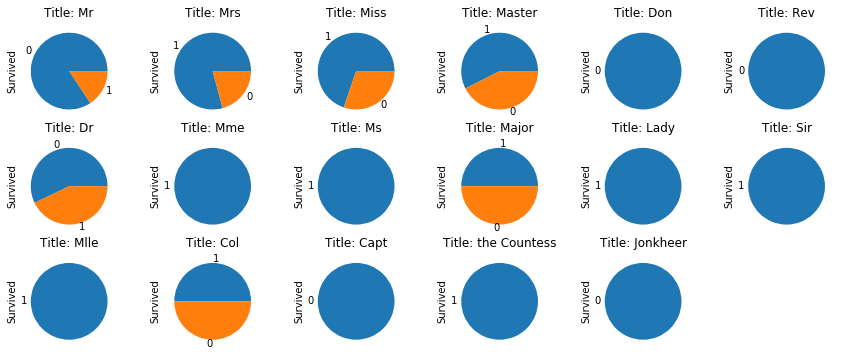

In [679]:
fig = plt.figure(figsize = (15, 6))
i = 1
for title in train_data['Name'].unique():
    fig.add_subplot(3, 6, i)
    plt.title("Title: {}".format(title))
    train_data.Survived[train_data["Name"] == title].value_counts().plot(kind = 'pie')
    i += 1
plt.show()

In [680]:

replacementName = {
    'Don': 0,
    'Rev': 0,
    'Jonkheer': 0,
    'Capt': 0,
    'Mr': 1,
    'Dr': 2,
    'Col': 3,
    'Major': 3,
    'Master': 4,
    'Miss': 5,
    'Mrs': 6,
    'Mme': 7,
    'Ms': 7,
    'Mlle': 7,
    'Sir': 7,
    'Lady': 7,
    'the Countess': 7
}

train_data['Name'] = train_data['Name'].apply(lambda x: replacementName.get(x))
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,6,0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,5,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,6,0,35.0,1,0,113803,53.1000,C123,S
4,0,3,1,1,35.0,0,0,373450,8.0500,NaN,S


In [681]:
from sklearn.preprocessing import StandardScaler
train_data['Name'] = StandardScaler().fit_transform(train_data["Name"].values.reshape(-1, 1))
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,-0.797294,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,1.537975,0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,1.070922,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,1.537975,0,35.0,1,0,113803,53.1000,C123,S
4,0,3,-0.797294,1,35.0,0,0,373450,8.0500,NaN,S


In [682]:
train_data["Age"] = StandardScaler().fit_transform(train_data['Age'].values.reshape(-1, 1))
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,-0.797294,1,-0.557420,1,0,A/5 21171,7.2500,NaN,S
1,1,1,1.537975,0,0.649410,1,0,PC 17599,71.2833,C85,C
2,1,3,1.070922,0,-0.255712,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,1.537975,0,0.423129,1,0,113803,53.1000,C123,S
4,0,3,-0.797294,1,0.423129,0,0,373450,8.0500,NaN,S


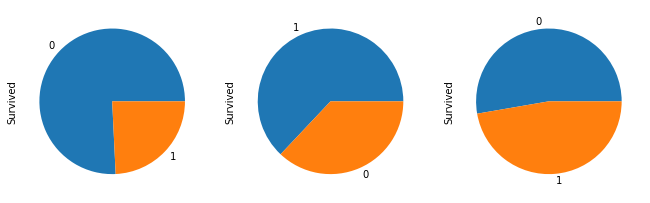

In [683]:
fig = plt.figure(figsize = (15, 6))

i = 1
for pclass in train_data['Pclass'].unique():
    fig.add_subplot(1, 4, i)
    train_data.Survived[train_data["Pclass"] == pclass].value_counts().plot(kind = 'pie')
    i += 1
plt.show()

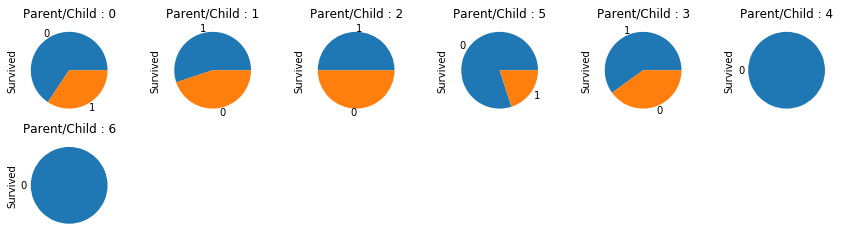

In [684]:
fig = plt.figure(figsize = (15, 6))

i = 1
for pclass in train_data['Parch'].unique():
    fig.add_subplot(3, 6, i)
    plt.title("Parent/Child : {}".format(pclass))
    train_data.Survived[train_data["Parch"] == pclass].value_counts().plot(kind = 'pie')
    i += 1
plt.show()

In [685]:
replacementParch = {
    6: 0,
    4: 0,
    5: 1,
    0: 2,
    2: 3,
    1: 4,
    3: 5
}

train_data["Parch"] = train_data['Parch'].apply(lambda x: replacementParch.get(x))
train_data["Parch"] = StandardScaler().fit_transform(train_data["Parch"].values.reshape(-1, 1))
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,-0.797294,1,-0.557420,1,-0.468807,A/5 21171,7.2500,NaN,S
1,1,1,1.537975,0,0.649410,1,-0.468807,PC 17599,71.2833,C85,C
2,1,3,1.070922,0,-0.255712,0,-0.468807,STON/O2. 3101282,7.9250,NaN,S
3,1,1,1.537975,0,0.423129,1,-0.468807,113803,53.1000,C123,S
4,0,3,-0.797294,1,0.423129,0,-0.468807,373450,8.0500,NaN,S


In [686]:
train_data.drop('Ticket', axis = 1, inplace = True)

In [687]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,-0.797294,1,-0.557420,1,-0.468807,7.2500,NaN,S
1,1,1,1.537975,0,0.649410,1,-0.468807,71.2833,C85,C
2,1,3,1.070922,0,-0.255712,0,-0.468807,7.9250,NaN,S
3,1,1,1.537975,0,0.423129,1,-0.468807,53.1000,C123,S
4,0,3,-0.797294,1,0.423129,0,-0.468807,8.0500,NaN,S


In [688]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [689]:
replacementEmbarked = {
    'S': 0,
    'Q': 1,
    'C': 2
}

train_data["Embarked"] = train_data["Embarked"].apply(lambda x: replacementEmbarked.get(x))
train_data["Embarked"] = StandardScaler().fit_transform(train_data["Embarked"].values.reshape(-1, 1))
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,-0.797294,1,-0.557420,1,-0.468807,7.2500,NaN,-0.586840
1,1,1,1.537975,0,0.649410,1,-0.468807,71.2833,C85,1.939555
2,1,3,1.070922,0,-0.255712,0,-0.468807,7.9250,NaN,-0.586840
3,1,1,1.537975,0,0.423129,1,-0.468807,53.1000,C123,-0.586840
4,0,3,-0.797294,1,0.423129,0,-0.468807,8.0500,NaN,-0.586840


In [690]:
print(train_data["SibSp"].unique())

[1 0 3 4 2 5 8]


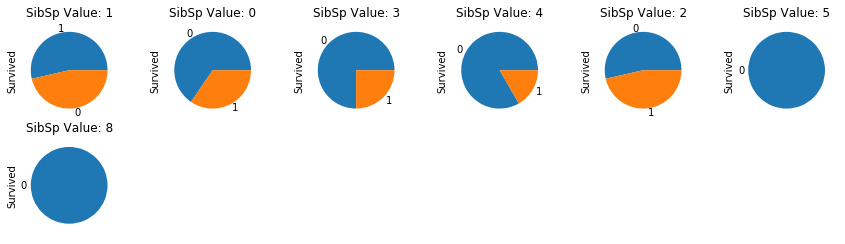

In [691]:
fig = plt.figure(figsize = (15, 6))

i = 1
for pclass in train_data['SibSp'].unique():
    fig.add_subplot(3, 6, i)
    plt.title("SibSp Value: {}".format(pclass))
    train_data.Survived[train_data["SibSp"] == pclass].value_counts().plot(kind = 'pie')
    i += 1
plt.show()

In [692]:
replacementSibSp = {
    5: 0,
    8: 0,
    4: 1,
    3: 2,
    0: 3,
    2: 4,
    1: 5
}

train_data["SibSp"] = train_data["SibSp"].apply(lambda x: replacementSibSp.get(x))
train_data["SibSp"] = StandardScaler().fit_transform(train_data["SibSp"].values.reshape(-1, 1))
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,-0.797294,1,-0.557420,1.576109,-0.468807,7.2500,NaN,-0.586840
1,1,1,1.537975,0,0.649410,1.576109,-0.468807,71.2833,C85,1.939555
2,1,3,1.070922,0,-0.255712,-0.396241,-0.468807,7.9250,NaN,-0.586840
3,1,1,1.537975,0,0.423129,1.576109,-0.468807,53.1000,C123,-0.586840
4,0,3,-0.797294,1,0.423129,-0.396241,-0.468807,8.0500,NaN,-0.586840


In [693]:
train_data["Cabin"].fillna("U", inplace = True)
train_data["Cabin"] = train_data["Cabin"].apply(lambda x: x[0])
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,-0.797294,1,-0.557420,1.576109,-0.468807,7.2500,U,-0.586840
1,1,1,1.537975,0,0.649410,1.576109,-0.468807,71.2833,C,1.939555
2,1,3,1.070922,0,-0.255712,-0.396241,-0.468807,7.9250,U,-0.586840
3,1,1,1.537975,0,0.423129,1.576109,-0.468807,53.1000,C,-0.586840
4,0,3,-0.797294,1,0.423129,-0.396241,-0.468807,8.0500,U,-0.586840


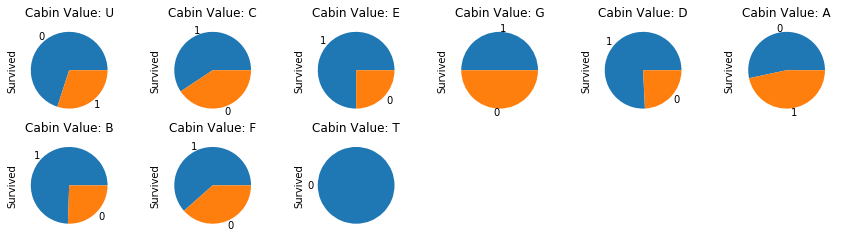

In [694]:
fig = plt.figure(figsize = (15, 6))

i = 1
for cabin in train_data['Cabin'].unique():
    fig.add_subplot(3, 6, i)
    plt.title("Cabin Value: {}".format(cabin))
    train_data.Survived[train_data["Cabin"] == cabin].value_counts().plot(kind = 'pie')
    i += 1
plt.show()

In [695]:
replacementCabin = {
    'T': 0,
    'U': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}

train_data["Cabin"] = train_data["Cabin"].apply(lambda x: replacementCabin.get(x))
train_data["Cabin"] = StandardScaler().fit_transform(train_data["Cabin"].values.reshape(-1, 1))
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,-0.797294,1,-0.557420,1.576109,-0.468807,7.2500,-0.494813,-0.586840
1,1,1,1.537975,0,0.649410,1.576109,-0.468807,71.2833,0.960231,1.939555
2,1,3,1.070922,0,-0.255712,-0.396241,-0.468807,7.9250,-0.494813,-0.586840
3,1,1,1.537975,0,0.423129,1.576109,-0.468807,53.1000,0.960231,-0.586840
4,0,3,-0.797294,1,0.423129,-0.396241,-0.468807,8.0500,-0.494813,-0.586840
5,0,3,-0.797294,1,0.045995,-0.396241,-0.468807,8.4583,-0.494813,0.676357
6,0,1,-0.797294,1,1.856240,-0.396241,-0.468807,51.8625,2.415274,-0.586840
7,0,3,0.603868,1,-2.065957,-1.382416,2.174907,21.0750,-0.494813,-0.586840
8,1,3,1.537975,0,-0.180285,-0.396241,0.853050,11.1333,-0.494813,-0.586840
9,1,2,1.537975,0,-1.160835,1.576109,-0.468807,30.0708,-0.494813,1.939555


In [696]:
#train_data.isna().values.sum()
np.where(np.isnan(train_data))

(array([ 61, 829]), array([9, 9]))

In [697]:
train_data[train_data.isnull().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,1.070922,0,0.649410,-0.396241,-0.468807,80.0,1.93026,NaN
829,1,1,1.537975,0,2.459655,-0.396241,-0.468807,80.0,1.93026,NaN


In [698]:
train_data['Embarked'].fillna(-1, inplace = True)

In [699]:
from sklearn.model_selection import train_test_split
survived = train_data["Survived"]
train_data.drop("Survived", axis = 1, inplace = True)
X_train, X_test, y_train,y_test = train_test_split(train_data, survived, test_size = 0.2, random_state = 42)

In [700]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [719]:
test_data = pd.read_csv("../input/titanic/test.csv")
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [720]:
passId = test_data["PassengerId"]
print(passId)

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64


In [721]:
test_data.drop('Ticket', axis = 1, inplace = True)
test_data.drop('PassengerId', axis = 1, inplace = True)

test_data["Name"] = test_data["Name"].map(lambda x: x.split(',')[1].split('.')[0].strip())

test_data['Age'].fillna(-1, inplace = True)
medians = dict()

for title in test_data["Name"].unique():
    median = test_data.Age[(test_data["Age"] != -1) & (test_data["Name"] == title)].median()
    medians[title] = median

for index, row in train_data.iterrows():
    if row['Age'] == -1:
        train_data.loc[index, 'Age'] = medians[row['Name']]
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,Mr,male,34.5,0,0,7.8292,NaN,Q
1,3,Mrs,female,47.0,1,0,7.0000,NaN,S
2,2,Mr,male,62.0,0,0,9.6875,NaN,Q
3,3,Mr,male,27.0,0,0,8.6625,NaN,S
4,3,Mrs,female,22.0,1,1,12.2875,NaN,S


In [722]:
test_data['Name'] = test_data['Name'].apply(lambda x: replacementName.get(x))
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1.0,male,34.5,0,0,7.8292,NaN,Q
1,3,6.0,female,47.0,1,0,7.0000,NaN,S
2,2,1.0,male,62.0,0,0,9.6875,NaN,Q
3,3,1.0,male,27.0,0,0,8.6625,NaN,S
4,3,6.0,female,22.0,1,1,12.2875,NaN,S


In [723]:
test_data["Cabin"].fillna("U", inplace = True)
test_data["Cabin"] = test_data["Cabin"].apply(lambda x: x[0])

In [724]:
test_data["Sex"] = LabelEncoder().fit_transform(test_data["Sex"])
test_data['SibSp'] = test_data['SibSp'].apply(lambda x: replacementSibSp.get(x))
test_data['Parch'] = test_data['Parch'].apply(lambda x: replacementParch.get(x))
test_data['Cabin'] = test_data['Cabin'].apply(lambda x: replacementCabin.get(x))
test_data['Embarked'] = test_data['Embarked'].apply(lambda x: replacementEmbarked.get(x))
test_data['Name'] = StandardScaler().fit_transform(test_data["Name"].values.reshape(-1, 1))
test_data['Age'] = StandardScaler().fit_transform(test_data["Age"].values.reshape(-1, 1))
test_data['Parch'] = StandardScaler().fit_transform(test_data["Parch"].values.reshape(-1, 1))
test_data['Embarked'] = StandardScaler().fit_transform(test_data["Embarked"].values.reshape(-1, 1))
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,-0.823676,1,0.596870,3,-0.444985,7.8292,1,0.470915
1,3,1.484610,0,1.296667,5,-0.444985,7.0000,1,-0.700767
2,2,-0.823676,1,2.136424,3,-0.444985,9.6875,1,0.470915
3,3,-0.823676,1,0.176992,3,-0.444985,8.6625,1,-0.700767
4,3,1.484610,0,-0.102927,5,2.218523,12.2875,1,-0.700767


In [725]:
test_data["Cabin"] = StandardScaler().fit_transform(test_data["Cabin"].values.reshape(-1, 1))
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,-0.823676,1,0.596870,3,-0.444985,7.8292,-0.478344,0.470915
1,3,1.484610,0,1.296667,5,-0.444985,7.0000,-0.478344,-0.700767
2,2,-0.823676,1,2.136424,3,-0.444985,9.6875,-0.478344,0.470915
3,3,-0.823676,1,0.176992,3,-0.444985,8.6625,-0.478344,-0.700767
4,3,1.484610,0,-0.102927,5,2.218523,12.2875,-0.478344,-0.700767


In [726]:
test_data['Name'].fillna((test_data['Name'].mean()), inplace=True)
test_data['Fare'].fillna((test_data['Fare'].mean()), inplace=True)
test_data['Parch'].fillna((test_data['Parch'].mean()), inplace=True)
test_data[test_data.isnull().any(axis=1)]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


In [727]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)
train_data['Embarked'].fillna(-1, inplace = True)
predcitions = model.predict(test_data)

0.8268156424581006


In [765]:
passIds = []
index = []
for i in passId:
    passIds.append(i)
result = {"PassengerId": passIds, "Survived": predcitions}
result_df = pd.DataFrame(result)
result_df.set_index(["PassengerId"], inplace = True)
result_df.to_csv("../working/gender_submission.csv")

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'